In [1]:
import os
from google.colab import drive
from zmq.sugar.frame import Frame
drive.mount("/content/drive",force_remount=True)
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [2]:
from fastai.vision import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
from IPython.display import Image as disImage
from PIL import Image
import glob
import keras
for dirname, _, filenames in os.walk('/content/drive/MyDrive'):
    for filename in filenames:
       os.path.join(dirname, filename)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MovieGenre.csv', encoding='latin1')
data.head(7500)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
...,...,...,...,...,...,...
7495,70948,http://www.imdb.com/title/tt70948,Zardoz (1974),5.8,Fantasy|Sci-Fi,https://images-na.ssl-images-amazon.com/images...
7496,54279,http://www.imdb.com/title/tt54279,School for Scoundrels (1960),7.5,Comedy,https://images-na.ssl-images-amazon.com/images...
7497,53976,http://www.imdb.com/title/tt53976,The Virgin Spring (1960),8.1,Drama,https://images-na.ssl-images-amazon.com/images...
7498,53935,http://www.imdb.com/title/tt53935,Ice Cold in Alex (1958),7.9,Adventure|Drama|War,https://images-na.ssl-images-amazon.com/images...


In [4]:
directory = '/content/drive/MyDrive/SampleMoviePosters/'
id_list = []

for filename in glob.iglob(f'{directory}/*'):
    f = filename.split('/')
    im = f[-1][:-4]
    id_list.append(im)

In [5]:
shape = (268, 182, 3)
same_dims = True
image_array = []
for i in id_list:
    file = '/content/drive/MyDrive/SampleMoviePosters/'+i+'.jpg'
    img= Image.open(file)
    np_img = np.array(img)
    image_array.append(np_img)
    if  shape != np_img.shape:
        same_dims= False
        print("different shapes")
        print(np_img.shape, 'ID', i)
if same_dims:
    print("All posters are of same dimentions already.\nAll images have been converted to numpy array")

All posters are of same dimentions already.
All images have been converted to numpy array


In [6]:
import csv
id_genre_dict = {}
title_dict = {}
with open('/content/drive/MyDrive/MovieGenre.csv', newline='', encoding = "ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        movie_id = row[0]
        gen = row[4]
        title = row[2]
        gen_split = gen.split('|')
        id_genre_dict.update({movie_id:gen_split})
        title_dict.update({movie_id:title})
print("id_genre_dict:\n key = string movie_id '12345',\n value = list genres ['Drama', 'Romance', 'Action', 'Adventure', 'Comedy', 'Family', 'History', 'Crime', 'Biography', 'Horror', '...']")

id_genre_dict:
 key = string movie_id '12345',
 value = list genres ['Drama', 'Romance', 'Action', 'Adventure', 'Comedy', 'Family', 'History', 'Crime', 'Biography', 'Horror', '...']


In [7]:
genres = id_genre_dict.values()
genres = [item for sublist in genres for item in sublist]
genres = set(genres)
genres = list(genres)
genres.remove('')
genres.remove('Genre')
genres.sort()
print(genres)

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']


In [8]:
multi_y =[]
for i in id_list:
    y_i = np.zeros(len(genres))
    gens = id_genre_dict[i]
    for g in gens:
        y_i[genres.index(g)] = 1
    multi_y.append(y_i)
print("List array")
print("[Action, Adventure] => [1,0,1,0,0,0...]")

List array
[Action, Adventure] => [1,0,1,0,0,0...]


In [9]:
print('check for correctness')
check_sample_index = 1
id_genre_dict[id_list[check_sample_index]], multi_y[check_sample_index]

check for correctness


(['Drama'],
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [10]:
img = np.asarray(image_array)
np.save('X.npy',img)
y = np.asarray(multi_y)
np.save('Y',y)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(268, 182, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(28, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [12]:
model.fit(img, y, epochs = 100, validation_split=0.01, batch_size=20)

Epoch 1/100
50/50 [==============================] - 14s 84ms/step - loss: 26.2904 - binary_accuracy: 0.9073 - val_loss: 0.5010 - val_binary_accuracy: 0.9321
Epoch 2/100
50/50 [==============================] - 3s 57ms/step - loss: 0.4557 - binary_accuracy: 0.9265 - val_loss: 0.4112 - val_binary_accuracy: 0.9321
Epoch 3/100
50/50 [==============================] - 3s 60ms/step - loss: 0.2336 - binary_accuracy: 0.9541 - val_loss: 0.3535 - val_binary_accuracy: 0.9321
Epoch 4/100
50/50 [==============================] - 3s 59ms/step - loss: 0.1056 - binary_accuracy: 0.9808 - val_loss: 0.5107 - val_binary_accuracy: 0.9286
Epoch 5/100
50/50 [==============================] - 3s 59ms/step - loss: 0.0381 - binary_accuracy: 0.9939 - val_loss: 0.5106 - val_binary_accuracy: 0.9286
Epoch 6/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0125 - binary_accuracy: 0.9986 - val_loss: 0.6817 - val_binary_accuracy: 0.9214
Epoch 7/100
50/50 [==============================] - 3s 58ms/s

In [13]:
score = 0
for img_no in range(len(image_array)):
    test_y = image_array[img_no]
    ty = np.reshape(test_y, (1,268, 182, 3))
    pred_genre = model.predict(ty)
    best_pred_genre = genres[np.argmax(pred_genre)]
    correct_genres = id_genre_dict[id_list[img_no]]
    if best_pred_genre in correct_genres:
        score +=1
print('accuracy = ', (score/len(image_array))*100, '%')

1/1 [==============================] - 0s 16ms/step
accuracy =  99.39819458375125 %


The Mad Doctor (1933)
1/1 [==============================] - 0s 17ms/step
Predicted Genres:
Short: 1.000
Animation: 1.000
Comedy: 0.999
Correct Genres: Animation Short Comedy


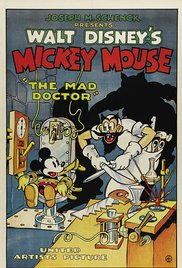

In [31]:
img_no = np.random.randint(low=0, high=996)
print(title_dict[id_list[img_no]])
test_y = image_array[img_no]
test_y.shape
ty = np.reshape(test_y, (1,268, 182, 3))
pred_genres = model.predict(ty)
if pred_genres.ndim == 1:
    pred_genres = np.expand_dims(pred_genres, axis=0)
top_indices = np.argsort(pred_genres[0])[-3:][::-1]
genres_array = np.array(genres)
print("Predicted Genres:")
for idx in top_indices:
    genre_label = genres_array[idx]
    genre_prob = pred_genres[0][idx]
    print(f"{genre_label}: {genre_prob:.3f}")
print("Correct Genres:", *id_genre_dict[id_list[img_no]])
Image.fromarray(test_y)